In [1]:
%matplotlib inline

In [3]:
import os
import sys
import face_recognition
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

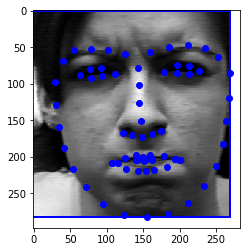

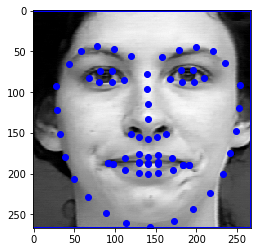

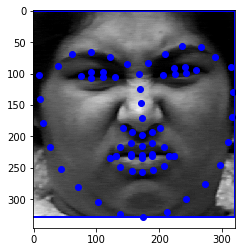

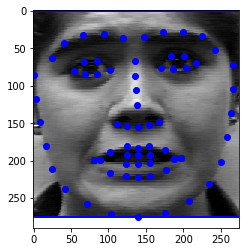

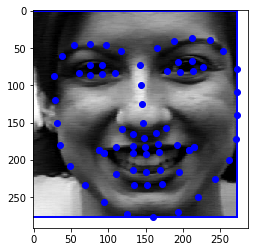

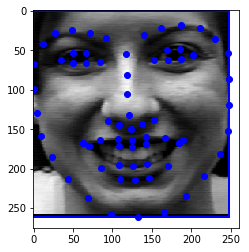

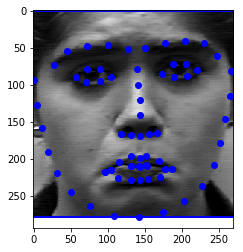

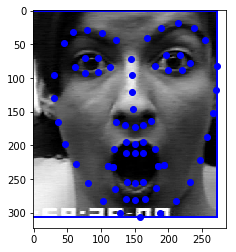

In [6]:
img_dir_pre_path = "E:\毕设\代码\my_scripts\data\CK+"
classes = os.listdir(img_dir_pre_path)
for c in classes:
    img_file_names = os.listdir(os.path.join(img_dir_pre_path, c))
    for img_file_name in img_file_names:
        img = Image.open(os.path.join(img_dir_pre_path, c, img_file_name))
        break
    top, right, bottom, left = face_recognition.face_locations(np.array(img))[0]
    face_landmarks = face_recognition.face_landmarks(np.array(img))[0]
    for name, plot_list in face_landmarks.items():
        for plot in plot_list:
            if plot[0] < left:
                left = plot[0]
            if plot[0] > right:
                right = plot[0]
            if plot[1] < top:
                top = plot[1]
            if plot[1] > bottom:
                bottom = plot[1]
    img = img.crop((left, top, right, bottom))
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.imshow(np.array(img), cmap="gray")
    
    for name, plot_list in face_landmarks.items():
        for plot in plot_list:
            ax.plot(plot[0]-left, plot[1]-top, 'bo')
    lines = []
    top, right, bottom, left = top-top, right-left, bottom-top, left-right
    lines.append([(top, top), (left, right)])
    lines.append([(top, bottom), (left, left)])
    lines.append([(top, bottom), (right, right)])
    lines.append([(bottom, bottom), (left, right)])
    for line_ys, line_xs in lines:
#         print(line_xs,line_ys)
        ax.add_line(Line2D(line_xs, line_ys, linewidth=2, color='blue'))
    
    
plt.show()